This project aims to develop a machine learning algorithm that is capable of classifying images of common bird found in the UK. The algorithm aims to distinguish the physical differences between the 5 birds.



Importing

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [6]:
image_size = (128, 128)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "BirdImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 6212 files belonging to 5 classes.
Using 4970 files for training.
Using 1242 files for validation.


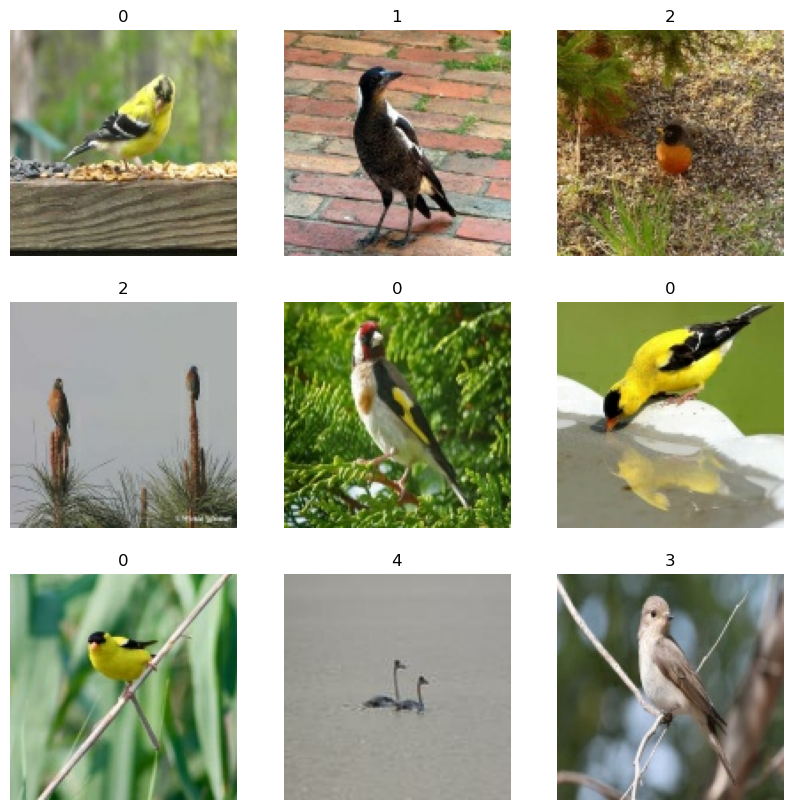

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

Data Augmentation

Currently in the dataset, there are around 1200-1400 images in each folder except for the 'sparrow' folder which only has 800 images. To address this I am going to perform data augmentation to create more images for the model to work with to ensure a uniform dataset spread.

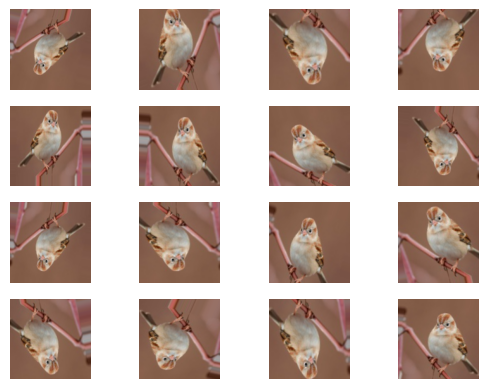

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array


dataGen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

img_path = 'BirdImages/Sparrow/0LL4O0ZH6JG3.jpg'
img = load_img(img_path)  
img = img_to_array(img)  
img = img.reshape((1,) + img.shape) 

augmented_images = []
for batch in dataGen.flow(img, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) >=16:
        break

for i, img in enumerate(augmented_images):
    plt.subplot(4,4, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

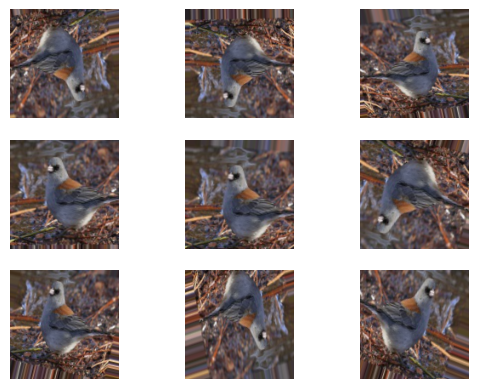

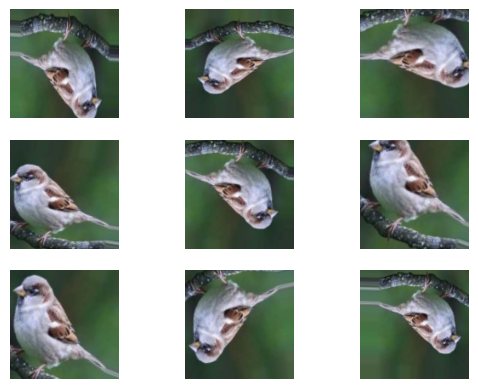

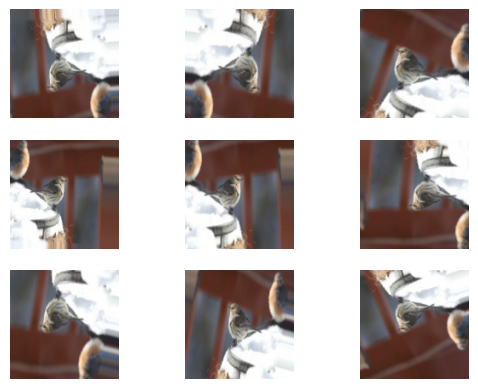

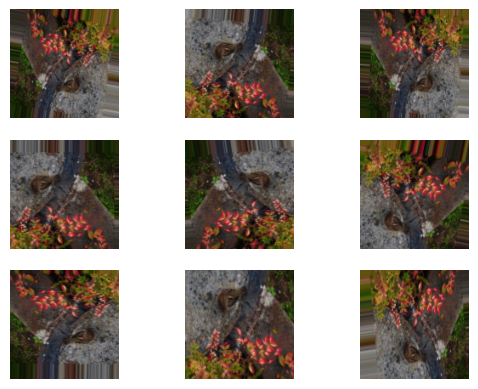

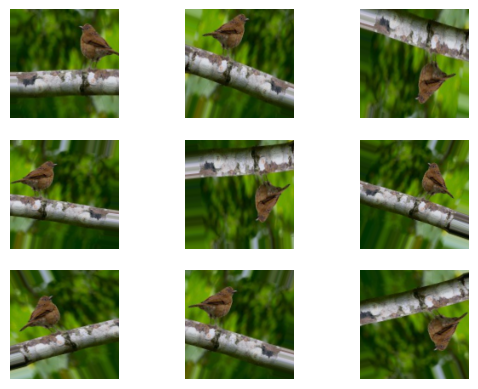

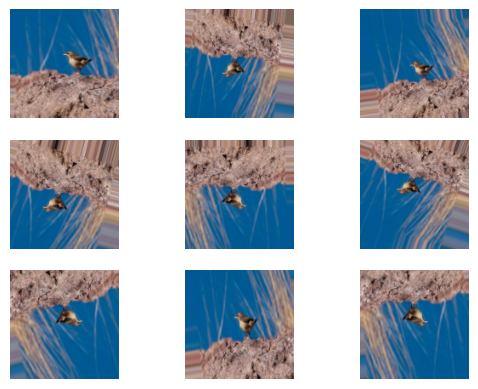

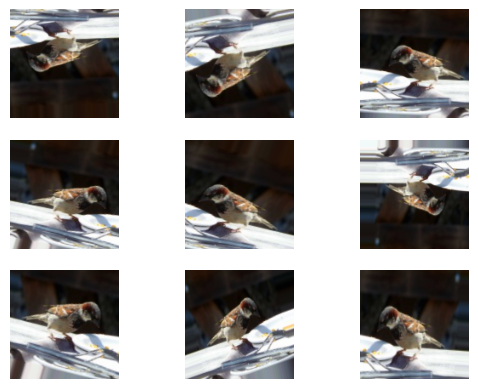

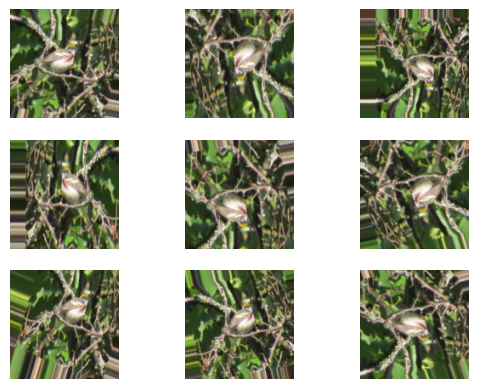

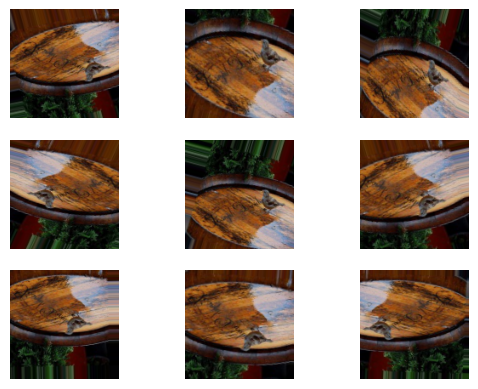

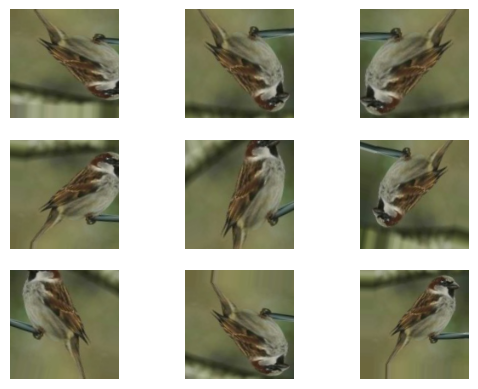

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array
import random

dataGen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

#Identify folder path
folder_path = 'BirdImages/Sparrow/'

#Listing images labeled with 'jpg' in the sparrow folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

#Randomly selects images for augmentation
selected_images = random.sample(image_files, 10)

for image_file in selected_images:
    img_path = os.path.join(folder_path,image_file)
    img = load_img(img_path)
    img = img_to_array(img) 
    img = img.reshape((1,) + img.shape)
    augmented_images = []
    for batch in dataGen.flow(img, batch_size=1):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >=9:
            break

    for i, img in enumerate(augmented_images):
        plt.subplot(3,3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()